In [107]:
### cs109default ### 
import random
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.model_selection import GridSearchCV
from random import randint 

from sklearn import tree
%matplotlib inline

import seaborn as sns
pd.set_option('display.width', 1500)
pd.set_option('display.max_columns', 100)

from sklearn.utils import shuffle

np.random.seed(112358)

In [2]:
import tensorflow as tf

print(tf.__version__)  # You should see a 2.0.0 here!

2.0.0


In [3]:
nn_train = pd.read_csv("nn_train.csv").set_index(["fid", "pid"])
nn_train.head()

scaled_duration  num_seed_songs  song_distance  artist_distance  album_distance  musical_similarity  response
fid pid                                                                                                               
59  549        -0.269296             169       0.830842         0.676425        0.689833            0.976354         1
    549        -0.707113             169       0.830842         0.676425        0.689833            0.980082         1
    549        -0.117009             169       0.830842         0.676425        0.689833            0.980873         1
    549        -0.807887             169       0.830842         0.676425        0.689833            0.981221         1
    549        -0.650126             169       0.830842         0.676425        0.689833            0.980248         1

In [4]:
nn_train_scaled = scale(nn_train.drop("response", axis=1))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(nn_train_scaled, 
                                                    nn_train["response"], 
                                                    train_size=5/46, 
                                                    random_state=42)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(nn_train.drop("response", axis=1), 
                                                    nn_train["response"], 
                                                    train_size=5/46, 
                                                    random_state=42)

In [159]:
sum(y_train)/len(y_train)

0.07905264364036726

In [173]:
# distance from 3 colab filters + cosine distance of features + number of seed songs

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu', input_shape = (X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(64, activation = "relu"),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# opt = tf.keras.optimizers.SGD(lr=0.2)
model.compile(loss='binary_crossentropy', optimizer="adam", metrics = ['accuracy'])

In [174]:
# try class weightings
from sklearn.utils import compute_class_weight
classWeight = compute_class_weight('balanced', [0,1], nn_train["response"].values) 
classWeight = dict(enumerate(classWeight))

In [175]:
history = model.fit(X_train.values, y_train.values, validation_split=0.2, epochs=5, 
                    verbose=1, batch_size=64, class_weight=classWeight)

Train on 160581 samples, validate on 40146 samples
Epoch 1/5
160581/160581 [==============================] - 10s 65us/sample - loss: 0.6617 - accuracy: 0.6141 - val_loss: 0.6516 - val_accuracy: 0.6729
Epoch 2/5
160581/160581 [==============================] - 9s 54us/sample - loss: 0.6416 - accuracy: 0.5720 - val_loss: 0.6275 - val_accuracy: 0.5063
Epoch 3/5
160581/160581 [==============================] - 9s 54us/sample - loss: 0.6335 - accuracy: 0.5856 - val_loss: 0.6239 - val_accuracy: 0.5130
Epoch 4/5
160581/160581 [==============================] - 9s 57us/sample - loss: 0.6287 - accuracy: 0.5922 - val_loss: 0.6095 - val_accuracy: 0.6857
Epoch 5/5
160581/160581 [==============================] - 9s 55us/sample - loss: 0.6241 - accuracy: 0.6055 - val_loss: 0.6385 - val_accuracy: 0.4466


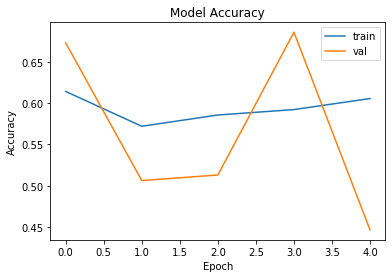

In [176]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

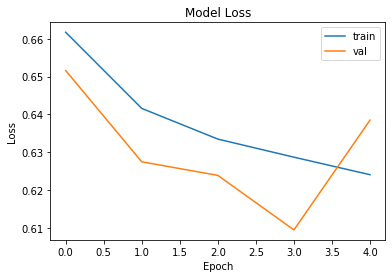

In [177]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

In [32]:
X_test.loc[(103, 143)]

//anaconda3/envs/tfcs109a/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


scaled_duration  num_seed_songs  song_distance  artist_distance  album_distance  musical_similarity
fid pid                                                                                                     
103 143         2.420438              79       0.980415         0.850929        0.956356            0.980605
    143         3.317974               6       0.928933         0.894591        0.918350            0.990882
    143        -0.368807             100       0.927055         0.785114        0.887761            0.991647
    143         0.230361             107       0.981651         0.701858        0.958297            0.993424
    143         0.507771              11       0.947514         0.850929        0.884530            0.985635
...                  ...             ...            ...              ...             ...                 ...
    143         0.418799              76       0.979899         0.844300        0.919096            0.990003
    143        -0.364610             100       0.927055         0.785114        0.887761            0.992008
    143        -0.115792               6       0.928933         0.894591        0.918350            0.990531
    143         1.102042              54       0.928933         0.881875        0.942265            0.987315
    143         1.584970              76       0.979899         0.844300        0.919096            0.994075

[289 rows x 6 columns]

In [47]:
labels = y_test.loc[(103, 143)].values

//anaconda3/envs/tfcs109a/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


In [34]:
predictions = model.predict(X_test.loc[(103, 143)].values)

//anaconda3/envs/tfcs109a/lib/python3.6/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


In [57]:
sorted_preds = pd.DataFrame(np.append(predictions, labels.reshape(-1,1), axis=1)).sort_values(0, ascending=False).reset_index(drop=True)

In [59]:
sorted_preds.loc[sorted_preds[1] == 1]

,0,1
28,0.575113,1.0
38,0.568679,1.0
51,0.554060,1.0
80,0.476552,1.0
124,0.415105,1.0
131,0.396105,1.0
138,0.382424,1.0
161,0.343269,1.0


In [63]:
accuracy_score(labels, (predictions > 0.5).astype('int'))

0.8062283737024222

# Evaluate our NN

In [185]:
def clickEvaluation(val_list, predictions_list):
    clicks = []
    for i in range(len(val_list)):
        predictions = predictions_list[i]
        val_playlist = val_list[i]
        positions_matching = np.where(np.isin(predictions["track_name"].values, val_playlist['track_name'].values))[0]
        if positions_matching.size == 0:
            clicks.append(50)
        else:
            clicks.append(math.floor(positions_matching[0] / 10))
    return np.mean(clicks)

In [187]:
nn_test = pd.read_csv("nn_train_10_clicks.csv").set_index(["val_fid", "val_pid"])
nn_test.sort_index(inplace = True)

In [188]:
ids = nn_test.index.unique().values

In [189]:
X

fid  pid  scaled_duration  num_seed_songs  song_distance  artist_distance  album_distance  musical_similarity  response
val_fid val_pid                                                                                                                         
560     995       59  107        -0.231706              66       0.903439         0.806351        0.842500            0.968826         0
        995       59  107        -0.624036              66       0.903439         0.806351        0.842500            0.935565         0
        995       59  107         0.139215              66       0.903439         0.806351        0.842500            0.987643         0
        995       59  107         1.090216              66       0.903439         0.806351        0.842500            0.987865         0
        995       59  107        -0.500541              66       0.903439         0.806351        0.842500            0.987683         0
...              ...  ...              ...             ...            ...              ...             ...                 ...       ...
        995      560  799        -0.587405              66       0.871196         0.759272        0.824772            0.986801         0
        995      560  799        -0.761763              66       0.871196         0.759272        0.824772            0.971335         0
        995      560  799        -0.677482              66       0.871196         0.759272        0.824772            0.983655         0
        995      560  799        -0.609023              66       0.871196         0.759272        0.824772            0.980697         0
        995      560  799        -0.528960              66       0.871196         0.759272        0.824772            0.988713         0

[767 rows x 9 columns]

In [190]:
original_clicks = []
new_clicks = []
for i in ids:
    X = nn_test.loc[i]
    positions_matching = np.where(X['response'].values == 1)[0]
    if positions_matching.size == 0:
        original_clicks.append(50)
        new_clicks.append(50)
    else:
        o_click = math.floor(positions_matching[0] / 10)
        original_clicks.append(o_click if o_click < 50 else 50)
        predictions = model.predict(X.drop(["fid", "pid", "response"], axis=1).values)
        X_pred = X.copy()
        X_pred['predictions'] = predictions
        sorted_response = X_pred.sort_values("predictions", ascending=False)["response"].values
        positions_matching = np.where(sorted_response == 1)[0]
        n_click = math.floor(positions_matching[0] / 10)
        new_clicks.append(n_click if n_click < 50 else 50)

In [191]:
np.mean(original_clicks)

20.322483725588384

In [192]:
np.mean(new_clicks)

14.271407110665999

## Evaluate adjusted precision

In [181]:
nn_test = pd.read_csv("nn_train_10_r.csv").set_index(["val_fid", "val_pid"])
nn_test.sort_index(inplace = True)

In [182]:
nn_test

fid  pid  scaled_duration  num_seed_songs  song_distance  artist_distance  album_distance  musical_similarity  response
val_fid val_pid                                                                                                                         
59      0         59  452         2.051246             143       0.950703         0.833292        0.904253            0.991222         0
        0         59  452        -0.446089             143       0.950703         0.833292        0.904253            0.989765         0
        0         59  452         0.158627             143       0.950703         0.833292        0.904253            0.988848         0
        0         59  452         0.376808             143       0.950703         0.833292        0.904253            0.984226         0
        0         59  452        -0.144032             143       0.950703         0.833292        0.904253            0.991195         0
...              ...  ...              ...             ...            ...              ...             ...                 ...       ...
560     995      560  799        -0.587405              66       0.871196         0.759272        0.824772            0.986801         0
        995      560  799        -0.761763              66       0.871196         0.759272        0.824772            0.971335         0
        995      560  799        -0.677482              66       0.871196         0.759272        0.824772            0.983655         0
        995      560  799        -0.609023              66       0.871196         0.759272        0.824772            0.980697         0
        995      560  799        -0.528960              66       0.871196         0.759272        0.824772            0.988713         0

[1871912 rows x 9 columns]

In [183]:
adjusted_precision = []
for i in ids:
    X = nn_test.loc[i]
    predictions = model.predict(X.drop(["fid", "pid", "response"], axis=1).values)
    X_pred = X.copy()
    X_pred['predictions'] = predictions
    sorted_response = X_pred.sort_values("predictions", ascending=False)["response"].values
    top_500 = sorted_response[0:500] if sorted_response.shape[0] > 500 else sorted_response
    adjusted_precision.append(sum((top_500 == 1).astype("int")) / top_500.shape[0])

In [184]:
np.mean(adjusted_precision)

0.0949934713390841